# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv("01_source/csv/IUCN_overview.csv")

In [42]:
df.head(3)

,cat,est number of described species,numb of species evaluated by 2018,numb of threatened species in 2018,"sp ev in 2018, as % of species described",non threat,not evaluated
0,mammals,5692,5692,1219,100.0,4473,0
1,birds,11126,11126,1492,100.0,9634,0
2,reptiles,10793,7127,1307,66.0,5820,3666


In [43]:
redlist = sum (df["numb of threatened species in 2018"])
redlist

25532

In [44]:
notthreatened =  sum (df["non threat"])
notthreatened

66197

In [45]:
nodata = sum (df["not evaluated"])
nodata

1425530

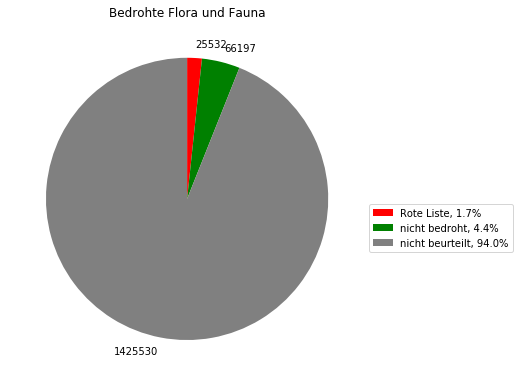

In [46]:
values = [25532, 66197, 1425530]
colors = ['r', 'g', 'grey']
labels = [
    'Rote Liste', 'nicht bedroht',
    'nicht beurteilt']


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Bedrohte Flora und Fauna')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

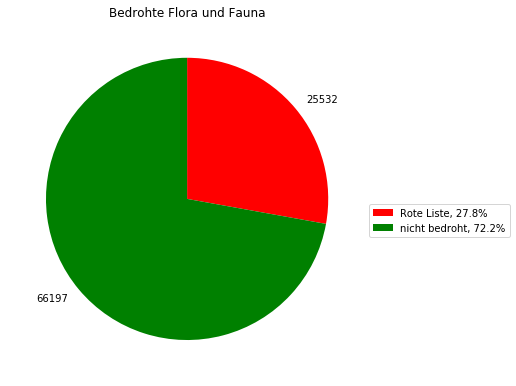

In [47]:
values = [25532, 66197]
colors = ['r', 'g']
labels = [
    'Rote Liste', 'nicht bedroht']


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Bedrohte Flora und Fauna')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

In [48]:
df.head(8)

,cat,est number of described species,numb of species evaluated by 2018,numb of threatened species in 2018,"sp ev in 2018, as % of species described",non threat,not evaluated
0,mammals,5692,5692,1219,100.0,4473,0
1,birds,11126,11126,1492,100.0,9634,0
2,reptiles,10793,7127,1307,66.0,5820,3666
3,amphibians,7926,6722,2092,85.0,4630,1204
4,fishes,34000,16803,2332,49.0,14471,17197
5,molluscs,85000,8627,2195,10.0,6432,76373
6,insects,1000000,8037,1537,0.8,6500,991963
7,plants and fungi,362722,27595,13358,7.6,14237,335127


In [49]:
df.pop("sp ev in 2018, as % of species described")
df.pop("est number of described species")
df.pop("numb of species evaluated by 2018")

df.head()

,cat,numb of threatened species in 2018,non threat,not evaluated
0,mammals,1219,4473,0
1,birds,1492,9634,0
2,reptiles,1307,5820,3666
3,amphibians,2092,4630,1204
4,fishes,2332,14471,17197


In [50]:
df.apply(lambda x: x.tolist(), axis=1)

0                    [mammals, 1219, 4473, 0]
1                      [birds, 1492, 9634, 0]
2                [reptiles, 1307, 5820, 3666]
3              [amphibians, 2092, 4630, 1204]
4                [fishes, 2332, 14471, 17197]
5               [molluscs, 2195, 6432, 76373]
6               [insects, 1537, 6500, 991963]
7    [plants and fungi, 13358, 14237, 335127]
dtype: object

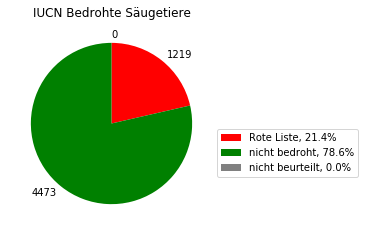

In [51]:
values = [1219, 4473, 0]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht', 'nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Säugetiere')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

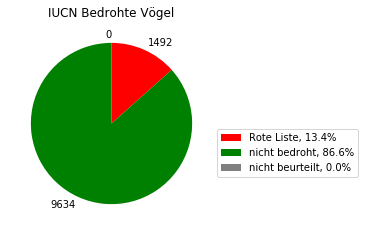

In [24]:
values = [1492, 9634, 0]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht', 'nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Vögel')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

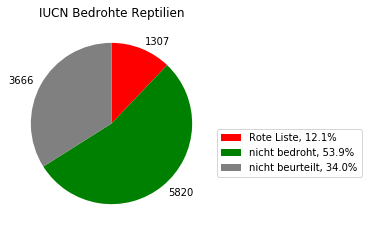

In [25]:
values = [1307, 5820, 3666]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht', 'nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Reptilien')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

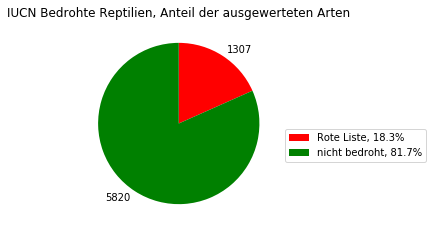

In [22]:
values = [1307, 5820]
colors = ['r', 'g']
labels = ['Rote Liste', 'nicht bedroht', 'nicht beurteilt']


fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Reptilien, Anteil der ausgewerteten Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

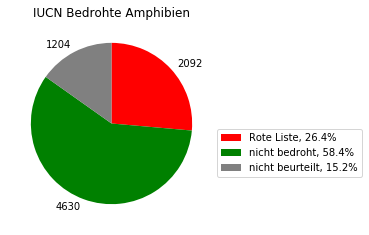

In [27]:
values = [2092, 4630, 1204]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht','nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Amphibien')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

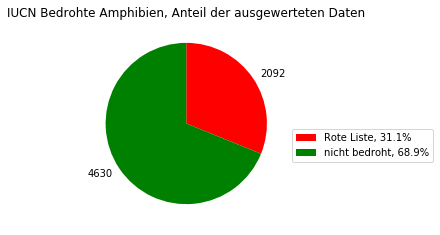

In [28]:
values = [2092, 4630]
colors = ['r', 'g']
labels = ['Rote Liste', 'nicht bedroht']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Amphibien, Anteil der ausgewerteten Daten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

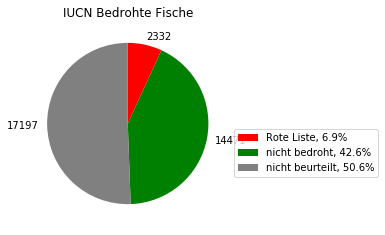

In [29]:
values = [2332, 14471, 17197]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht', 'nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Fische')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

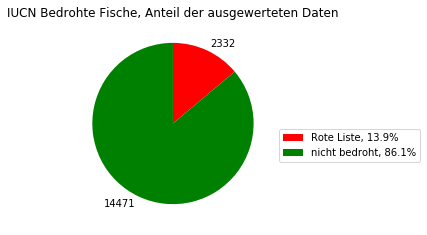

In [30]:
values = [2332, 14471]
colors = ['r', 'g']
labels = ['Rote Liste', 'nicht bedroht']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Fische, Anteil der ausgewerteten Daten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

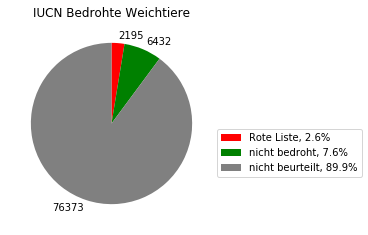

In [31]:
values = [2195, 6432, 76373]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht','nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Weichtiere')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

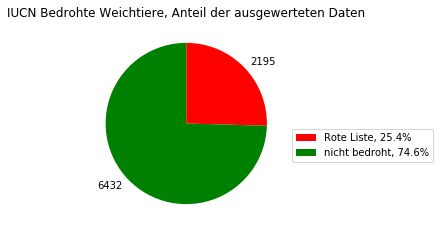

In [32]:
values = [2195, 6432]
colors = ['r', 'g']
labels = ['Rote Liste', 'nicht bedroht']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Weichtiere, Anteil der ausgewerteten Daten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

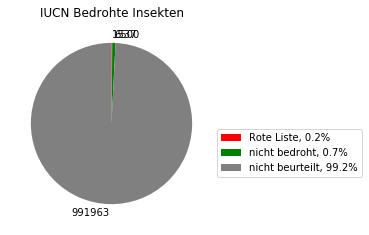

In [33]:
values = [1537, 6500, 991963]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht','nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Insekten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

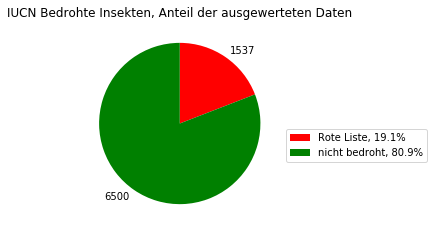

In [34]:
values = [1537, 6500]
colors = ['r', 'g']
labels = ['Rote Liste', 'nicht bedroht']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Insekten, Anteil der ausgewerteten Daten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

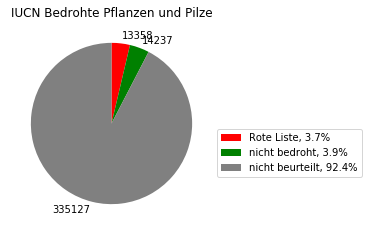

In [35]:
values = [13358, 14237, 335127]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht', 'nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Pflanzen und Pilze')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

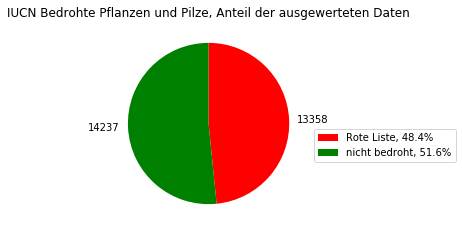

In [36]:
values = [13358, 14237]
colors = ['r', 'g']
labels = ['Rote Liste', 'nicht bedroht']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Pflanzen und Pilze, Anteil der ausgewerteten Daten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()